In [124]:
from skimage import io, data, filters, feature
from skimage.util import crop
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import distance_transform_edt

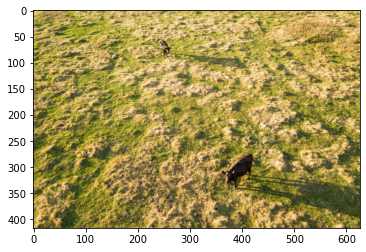

In [125]:
img = io.imread("cow.img", plugin="matplotlib")
plt.imshow(img)

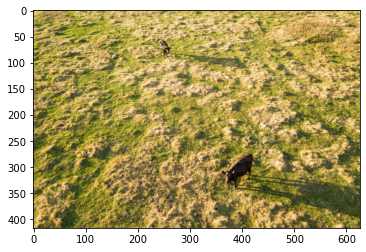

In [126]:
# crop  entire image
x1 = 0
y1 = 0
x2 = 626
y2 = 417
cropped = img[y1:y2,x1:x2]
plt.imshow(cropped)

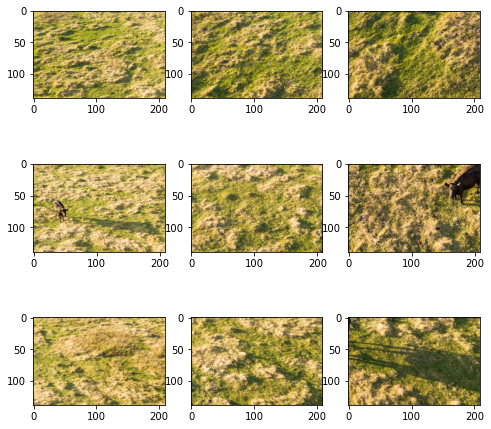

In [127]:
def split_image_n(img, nrows, ncols):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/ncols
    y_interval = y_len/nrows

    cropped_images = []
    i = 0
    while (i < x_len):
        j = 0
        while (j < y_len):
            x1 = round(i)
            y1 = round(j)
            x2 = round(i + x_interval)
            y2 = round(j + y_interval)
            cropped = img[y1:y2,x1:x2]
            cropped_images.append(cropped)
            j += y_interval
        i += x_interval
        
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, ncols*nrows + 1):
        img = cropped_images[i - 1]
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(img)
    plt.show()

nrows = 3
ncols = 3
split_image_n(img, nrows, ncols)